<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [0]:
import requests
from bs4 import BeautifulSoup


def collect_title_votes(link):
    data = []
    raw_html = requests.get(link).content.decode('utf-8')
    html_parser = BeautifulSoup(raw_html, 'html.parser')
    title_results = html_parser.findAll('tr', attrs={'class': 'athing'})
    voting_results = html_parser.findAll('span', attrs={'id': 'score'})

    for r in title_results:
        title_id = r.attrs["id"]
        title_str = r.find('a', attrs={"class":"storylink"}).contents[0]
        # get score corresponding to title id
        title_score = html_parser.find('span', attrs={"id":f"score_{title_id}"}).contents[0]
        title_score = int(title_score.split(" ")[0])
        data.append((title_str, title_score))
    return data

collect_title_votes("https://news.ycombinator.com/")

[('Linux 5.6', 104),
 ('Lead-Free Solder Is Better for You', 215),
 ('The origin story of the N95 mask', 137),
 ('Server-Side Only React with Next', 33),
 ('Show HN: RapidFuzz – A fast string matching library for Python', 58),
 ("French companies benefiting from state aid can't buy back shares", 144),
 ('Grab your crayons, it’s coloring time', 242),
 ('Austria to Make Basic Face Masks Compulsory in Supermarkets', 5),
 ('A Definitive Guide to Enabling Italics in Vim and Tmux', 49),
 ('Covid-19 Sanity – Covid-19 papers from bioRxiv/medRxiv searchable and sortable',
  73),
 ('Neanderthals Feasted on Seafood, Seabirds, Perhaps Even Dolphins', 31),
 ('Coding Stories: Coding on the C64 (2015)', 30),
 ('Microsoft: Cloud services demand up, prioritization rules in place', 423),
 ('Vuiet, the long road to building my own music player in Lisp', 15),
 ('NASA picks SpaceX to deliver cargo to the Lunar Gateway', 11),
 ('Determining an Election in K', 56),
 ('Cellular Automata: Rule 30 fed as input 

**Question 2**:  Write a function that collects data on four Harry Potter movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [0]:
!pip install tmdbv3api

In [0]:
from tmdbv3api import TMDb

tmdb = TMDb()
tmdb.api_key = '1aea115674a8c85f53c5233025f88721'
tmdb.language = 'en'

def collect_potter_movies(num):
    from tmdbv3api import Movie
    movie = Movie()
    for potter_movie in movie.search('Harry Potter')[:num]:
        print("*"*20)
        print("Movie Title: {}".format(potter_movie.title))
        print("Movie Overview: {}".format(potter_movie.overview))
        print("Movie Vote Average: {}".format(potter_movie.vote_average))
        print("Movie Poster Path: {}".format(potter_movie.poster_path))

collect_potter_movies(4)

********************
Movie Title: Harry Potter and the Philosopher's Stone
Movie Overview: Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame.
Movie Vote Average: 7.8
Movie Poster Path: /gHPtCmMeDqjaGqnMrWGDmD3nKd2.jpg
********************
Movie Title: Harry Potter and the Chamber of Secrets
Movie Overview: Cars fly, trees fight back, and a mysterious house-elf comes to warn Harry Potter at the start of his second year at Hogwarts. Adventure and danger await when bloody writing on a wall announces: The Chamber Of Secrets Has Been Opened. To save Hogwarts will require all of Harry, Ron and Hermione’s magical abilities and courage.
M

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [0]:
# which question to answer - put your ID number and run the code 
your_id  = "316460443"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


In [2]:
!mkdir /root/.kaggle/
!mkdir ./datasets
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liaddekel","key":"f108a5e28c6e44704d469f7ae7614d16"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# download and unzip dataset
!kaggle datasets list -s kickstarter-projects
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!unzip ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

ref                                              title                                        size  lastUpdated          downloadCount  
-----------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                     Kickstarter Projects                         37MB  2018-02-08 09:02:30          35509  
codename007/funding-successful-projects          Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2420  
socathie/kickstarter-project-statistics          Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           5358  
toshimelonhead/400000-kickstarter-projects       400,000 Kickstarter Projects                   0B  2019-07-23 01:23:31            147  
uysalah/archived-kickstarter-projects            Archived Kickstarter Projects                 1MB  2019-05-10 04:33:22            125  
yashkantharia/kickstarter-campaigns      

**Question 1:** On average which project category received the highest number of backers? (15 pt) 

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month is there the highest number of projects? (15 pt)

In [4]:
import pandas as pd

CSV_PATH = "./datasets/kickstarter-projects/ks-projects-201801.csv"

pd.read_csv(CSV_PATH)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [5]:
import pandas as pd

CSV_PATH = "./datasets/kickstarter-projects/ks-projects-201801.csv"

df = pd.read_csv(CSV_PATH)

# adding launching_month column by slicing launching-date column
df['launching_month'] = df['launched'].str[5:7]
# use group by to get groups of month
groups = df.groupby('launching_month')

# take the month with the biggest group
# after using count() all columns have the count value, so we sort by 'name'
desc_count_groups = groups.count().sort_values("name", ascending=0)
print(f"The month with the highest number of project is {desc_count_groups.index[0]}")

The month with the highest number of project is 07


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

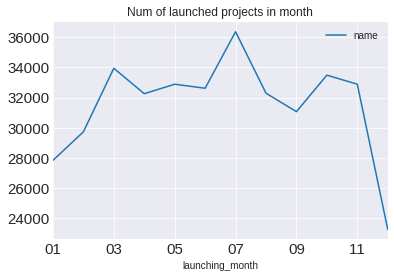

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use(['seaborn-dark'])
groups.count().plot(y="name", grid=True, 
                    title="Num of launched projects in month", fontsize=15)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer one of following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [0]:
# download and unzip dataset
!kaggle datasets list -s kickstarter-projects
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/
!unzip ./datasets/marvel/*.zip  -d ./datasets/marvel/

ref                                              title                                        size  lastUpdated          downloadCount  
-----------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                     Kickstarter Projects                         37MB  2018-02-08 09:02:30          35447  
codename007/funding-successful-projects          Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2420  
socathie/kickstarter-project-statistics          Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           5356  
toshimelonhead/400000-kickstarter-projects       400,000 Kickstarter Projects                   0B  2019-07-23 01:23:31            147  
uysalah/archived-kickstarter-projects            Archived Kickstarter Projects                 1MB  2019-05-10 04:33:22            125  
yashkantharia/kickstarter-campaigns      

In [0]:
import pandas as pd

CSV_PATH_MARVEL = "./datasets/marvel/hero-network.csv"
pd.read_csv(CSV_PATH_MARVEL)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [0]:
import pandas as pd

CSV_PATH_MARVEL = "./datasets/marvel/hero-network.csv"
CSV_PATH_NODES = "./datasets/marvel/nodes.csv"

marvel_df = pd.read_csv(CSV_PATH_MARVEL)
marvel_df_copy = marvel_df.copy()

# replace contents of 'hero1' and 'hero2' in marvel_df_copy
marvel_df_copy['temp'] = marvel_df_copy['hero1']
marvel_df_copy['hero1'] = marvel_df_copy['hero2']
marvel_df_copy['hero2'] = marvel_df_copy['temp']
marvel_df_copy.drop(columns=['temp'], inplace=True)

# now by concatenating both we have all relations in one direction (hero1->hero2)
# and now all we need to do is groupby('hero1')
merged_marvel_df = pd.concat([marvel_df, marvel_df_copy])
# remove duplicated relations in case there are
merged_marvel_df.drop_duplicates(inplace=True)

hero1_groups = merged_marvel_df.groupby("hero1")
hero1_groups_descending = hero1_groups.count().sort_values("hero2", ascending=0)
# take top 10
hero1_groups_descending[:10]

,hero2
hero1,
CAPTAIN AMERICA,1907
SPIDER-MAN/PETER PAR,1737
IRON MAN/TONY STARK,1522
THING/BENJAMIN J. GR,1416
MR. FANTASTIC/REED R,1379
WOLVERINE/LOGAN,1371
HUMAN TORCH/JOHNNY S,1361
SCARLET WITCH/WANDA,1325
THOR/DR. DONALD BLAK,1289


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)